In [764]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [766]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [767]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [769]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [771]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [773]:
train_df = train_df.set_index(train_df['PassengerId']).drop('PassengerId', axis=1)
test_df = test_df.set_index(test_df['PassengerId']).drop('PassengerId', axis=1)

In [775]:
train_df['Pclass'] = train_df['Pclass'].astype(object)
test_df['Pclass'] = test_df['Pclass'].astype(object)

In [776]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

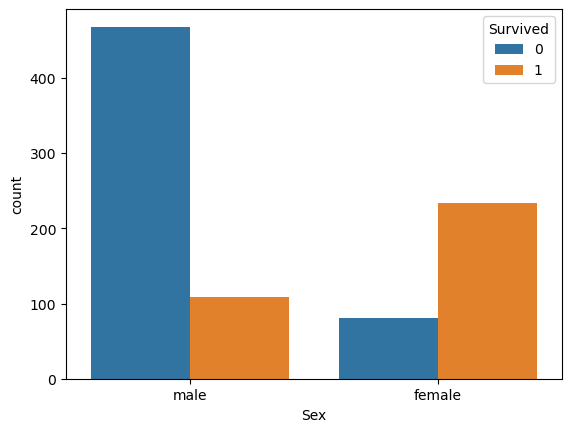

In [778]:
sns.countplot(train_df, x='Sex', hue='Survived');

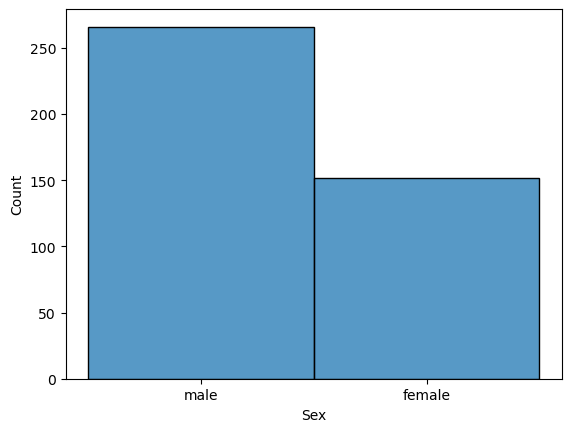

In [781]:
sns.histplot(data=test_df['Sex']);

<Axes: xlabel='Age', ylabel='Count'>

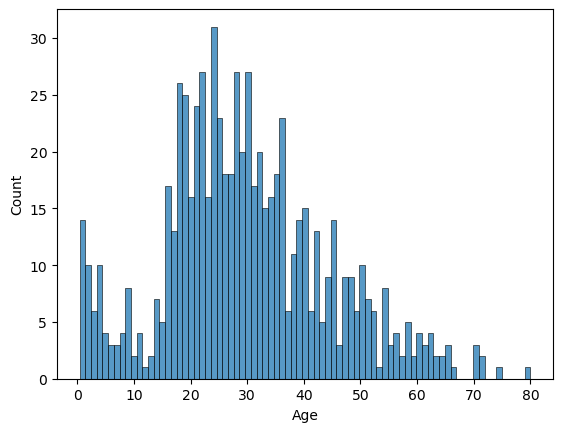

In [782]:
sns.histplot(train_df['Age'], bins=79)

<Axes: ylabel='Age'>

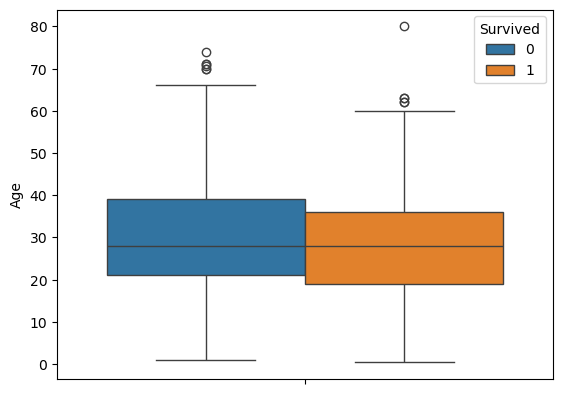

In [783]:
sns.boxplot(train_df, y='Age', hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

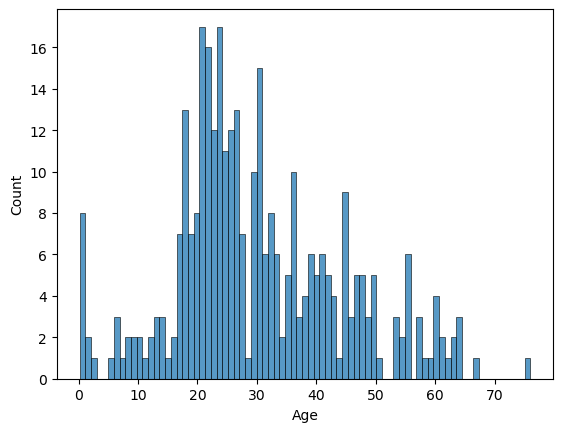

In [784]:
sns.histplot(test_df['Age'], bins=79)

In [785]:
train_df[train_df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,male,NaN,0,0,345777,9.5000,NaN,S


In [787]:
train_df[train_df['Age'].isna()]['Ticket'].nunique()

155

In [788]:
np.mean(train_df['Age'])

29.69911764705882

In [789]:
np.mean(test_df['Age'])

30.272590361445783

In [790]:
np.mean(train_df[train_df['Age'] <= 15]['Age'])

6.369518072289156

Задача 1. Предсказать возраст (при помощи основных данных и регрессионной модели предсказывать возраст)

Задача 2. Удалить тикет и кабин или оставить и сделать дамми переменными. Сначала попробуем удалить.


In [793]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [794]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [795]:
train_df = train_df[train_df['Embarked'].notna()]

## Создадим модель для предсказания возраста у тех, у кого его нет

In [797]:
data = pd.concat([train_df.drop('Survived', axis=1), test_df])

In [799]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [800]:
data = pd.get_dummies(data, columns=['Pclass', 'Sex', 'Embarked'], dtype=int)

In [801]:
data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1


## Разобъем данные для первой модели

In [804]:
train_data = data[data['Age'].notna()]
prod_data = data[data['Age'].isna()]

In [876]:
X = train_data.drop('Age', axis=1)
y = train_data['Age']

In [880]:
from sklearn.model_selection import train_test_split

In [882]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [884]:
from sklearn.linear_model import LinearRegression

In [809]:
model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
train_error = np.sqrt(np.mean((y_train - train_predictions)**2))
val_error = np.sqrt(np.mean((y_val - val_predictions)**2))

print(train_error)
print(val_error)
print(model.coef_)


12.67347065141868
11.675374796872287
[-3.15961258e+00 -1.00847475e+00 -1.07400212e-02  9.24014200e+00
 -2.42605223e+00 -6.81408977e+00 -1.15913049e+00  1.15913049e+00
 -3.39195644e+00  3.38702277e+00  4.93366508e-03]


In [886]:
from sklearn.neighbors import KNeighborsRegressor

In [888]:
from sklearn.metrics import root_mean_squared_error

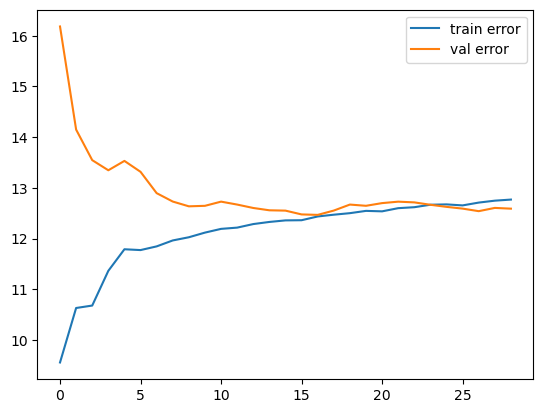

In [890]:
train_errors = []
val_errors = []
for n in range(1, 30):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)
    train_errors.append(root_mean_squared_error(y_train, train_predictions))
    val_errors.append(root_mean_squared_error(y_val, val_predictions))

plt.plot(train_errors, label='train error')
plt.plot(val_errors, label='val error')
plt.legend();


In [892]:
from sklearn.model_selection import GridSearchCV

In [894]:
model = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 30)}
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
print(root_mean_squared_error(y_val, val_pred))

{'n_neighbors': 26}
12.591486941856019


In [824]:
from sklearn.ensemble import RandomForestRegressor

In [826]:
model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [64, 100, 128],
              'max_depth': range(3, 11),
              'max_features': ["sqrt", "log2"]
             }
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
train_pred = grid_model.predict(X_train)
print(root_mean_squared_error(y_train, train_pred))
print(root_mean_squared_error(y_val, val_pred))

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
10.925276562662061
10.978974261756113


In [829]:
from catboost import CatBoostRegressor

In [831]:
model = CatBoostRegressor(random_state=42, verbose=False)
param_grid = {'iterations': [64, 100, 128],
              'learning_rate': np.linspace(0, 0.5, 11),
              'depth': range(3, 7)
             }
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
train_pred = grid_model.predict(X_train)
print(root_mean_squared_error(y_train, train_pred))
print(root_mean_squared_error(y_val, val_pred))

{'depth': 5, 'iterations': 64, 'learning_rate': 0.15000000000000002}
10.750371076276137
10.784798511878348


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/catboost/core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [896]:
model = CatBoostRegressor(random_state=42, verbose=False, iterations=64, learning_rate=0.15000000000000002, depth=5)
model.fit(X_train, y_train)

In [898]:
prod_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
6,33.0,0,0,8.4583,0,0,1,0,1,0,1,0
18,34.0,0,0,13.0000,0,1,0,0,1,0,0,1
20,28.0,0,0,7.2250,0,0,1,1,0,1,0,0
27,27.0,0,0,7.2250,0,0,1,0,1,1,0,0
29,25.0,0,0,7.8792,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,25.0,0,0,7.7208,0,0,1,1,0,0,1,0
1302,26.0,0,0,7.7500,0,0,1,1,0,0,1,0
1305,28.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [900]:
X_prod = prod_data.drop('Age', axis=1)

In [902]:
X_prod

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
6,0,0,8.4583,0,0,1,0,1,0,1,0
18,0,0,13.0000,0,1,0,0,1,0,0,1
20,0,0,7.2250,0,0,1,1,0,1,0,0
27,0,0,7.2250,0,0,1,0,1,1,0,0
29,0,0,7.8792,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1300,0,0,7.7208,0,0,1,1,0,0,1,0
1302,0,0,7.7500,0,0,1,1,0,0,1,0
1305,0,0,8.0500,0,0,1,0,1,0,0,1


In [904]:
age = np.round(model.predict(X_prod))

In [906]:
prod_data['Age'] = age
prod_data['Age']

/var/folders/4s/l8xqp77s5rqfpyr688_y77j00000gn/T/ipykernel_37665/1660384099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data['Age'] = age


PassengerId
6       33.0
18      34.0
20      26.0
27      27.0
29      25.0
        ... 
1300    26.0
1302    26.0
1305    28.0
1308    28.0
1309    16.0
Name: Age, Length: 263, dtype: float64

In [908]:
prod_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
6,33.0,0,0,8.4583,0,0,1,0,1,0,1,0
18,34.0,0,0,13.0000,0,1,0,0,1,0,0,1
20,26.0,0,0,7.2250,0,0,1,1,0,1,0,0
27,27.0,0,0,7.2250,0,0,1,0,1,1,0,0
29,25.0,0,0,7.8792,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,26.0,0,0,7.7208,0,0,1,1,0,0,1,0
1302,26.0,0,0,7.7500,0,0,1,1,0,0,1,0
1305,28.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [910]:
new_df = pd.concat([prod_data, train_data]).sort_index()

In [912]:
new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,28.0,0,0,8.0500,0,0,1,0,1,0,0,1
1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1


### Разобъем данные на тест и тренировку + валидацию. Сделаем выбор по passengerid

In [915]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,NaN,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [917]:
new_train_df = new_df[new_df.index <= 891]
new_test_df = new_df[new_df.index > 891]

In [919]:
X = new_train_df

In [921]:
y = train_df['Survived']

In [923]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [925]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [927]:
model = LogisticRegression(random_state=42, max_iter=10000)
param_grid = {'penalty': ['l1', 'l2'],
              'C': np.linspace(0.5, 2, 20),
              'solver': ['lbfgs', 'liblinear']
             }
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
train_pred = grid_model.predict(X_train)
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8265625
0.75625


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    sol

In [929]:
from sklearn.neighbors import KNeighborsClassifier

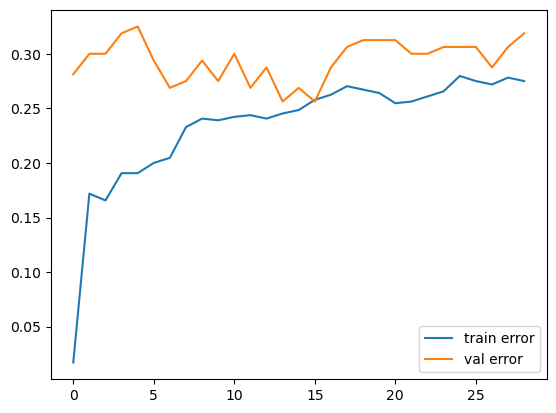

In [931]:
model = KNeighborsClassifier()
train_errors = []
val_errors = []
for n in range(1, 30):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)
    train_errors.append(1 - accuracy_score(y_train, np.round(train_predictions)))
    val_errors.append(1 - accuracy_score(y_val, np.round(val_predictions)))

plt.plot(train_errors, label='train error')
plt.plot(val_errors, label='val error')
plt.legend();


In [933]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
print(accuracy_score(y_train, np.round(train_predictions)))
print(accuracy_score(y_val, np.round(val_predictions)))

0.7953125
0.73125


In [935]:
from sklearn.ensemble import RandomForestClassifier

In [937]:
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [64, 100, 128],
              'max_depth': range(3, 11),
              'max_features': ["sqrt", "log2"]
             }
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
train_pred = grid_model.predict(X_train)
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.846875
0.775


In [961]:
model = RandomForestClassifier(random_state=42, max_depth=5, max_features='sqrt', n_estimators=100)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
print(accuracy_score(y_train, np.round(train_predictions)))
print(accuracy_score(y_val, np.round(val_predictions)))

0.846875
0.775


In [963]:
from catboost import CatBoostClassifier

In [965]:
model = CatBoostClassifier(random_state=42, verbose=False)
param_grid = {'iterations': [64, 100, 128],
              'learning_rate': np.linspace(0, 0.5, 11),
              'depth': range(3, 7)
             }
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
val_pred = grid_model.predict(X_val)
train_pred = grid_model.predict(X_train)
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

{'depth': 3, 'iterations': 64, 'learning_rate': 0.1}
0.8390625
0.79375


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/opt/anaconda3/lib/python3.12/site-packages/catboost/core.py", line

In [967]:
model = CatBoostClassifier(random_state=42, verbose=False, depth=3, iterations=64, learning_rate=0.1)
model.fit(X_train, y_train)
res = pd.DataFrame([new_test_df.index, model.predict(new_test_df)]).T


In [969]:
res.columns = ['PassengerId', 'Survived']

In [971]:
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [749]:
res.to_csv('gender_submission.csv')

In [973]:
res = res.set_index('PassengerId')

In [975]:
res

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [977]:
res.to_csv('gender_submission.csv')